***Assignment 3***

In [149]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics

### 2. Load Dataset 

In [150]:
df = pd.read_csv("C:/Users/anura/Desktop/IBM/Assignment/data/abalone.csv")

In [151]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [152]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### 3. Data Visualization

<AxesSubplot:xlabel='Length', ylabel='Height'>

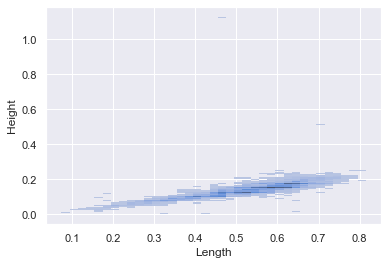

In [153]:
sns.histplot(x='Length', y='Height',data = df)

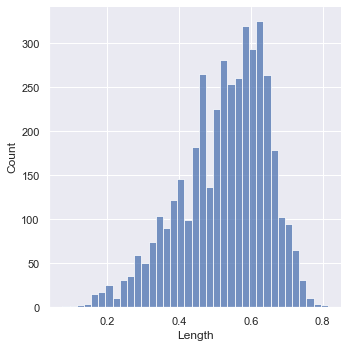

In [154]:
sns.displot(df.Length)

<AxesSubplot:xlabel='Rings', ylabel='Height'>

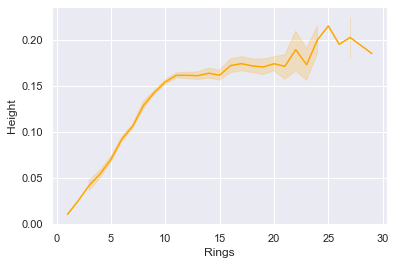

In [155]:
sns.lineplot(x=df.Rings,y=df.Height, color='orange')

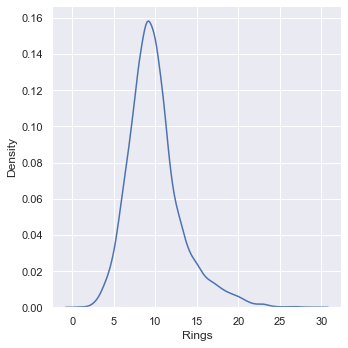

In [156]:
sns.set_theme()
sns.displot(df['Rings'], kind='kde')

<AxesSubplot:xlabel='Rings', ylabel='Density'>

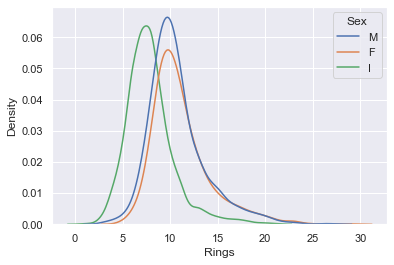

In [157]:
# KDE Plot
sns.kdeplot(x ='Rings', data = df, hue = 'Sex')

C:\Users\anura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rings'>

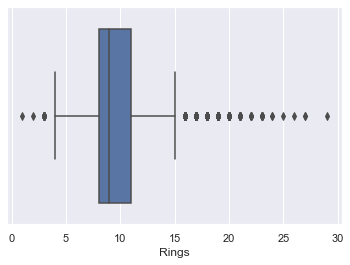

In [159]:
sns.boxplot(df['Rings'])

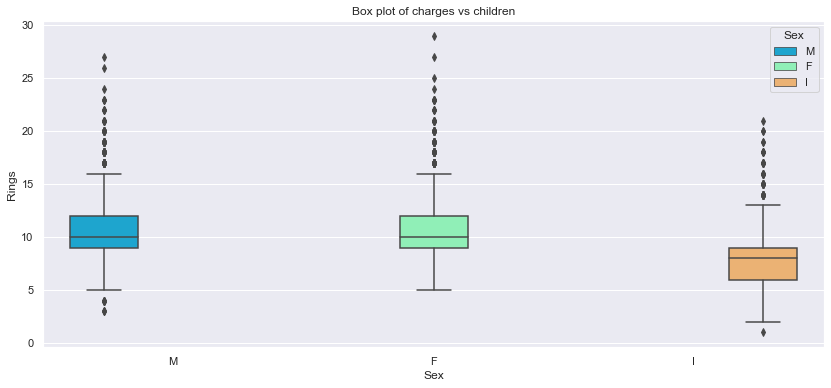

In [160]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Sex', y='Rings',hue='Sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

C:\Users\anura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


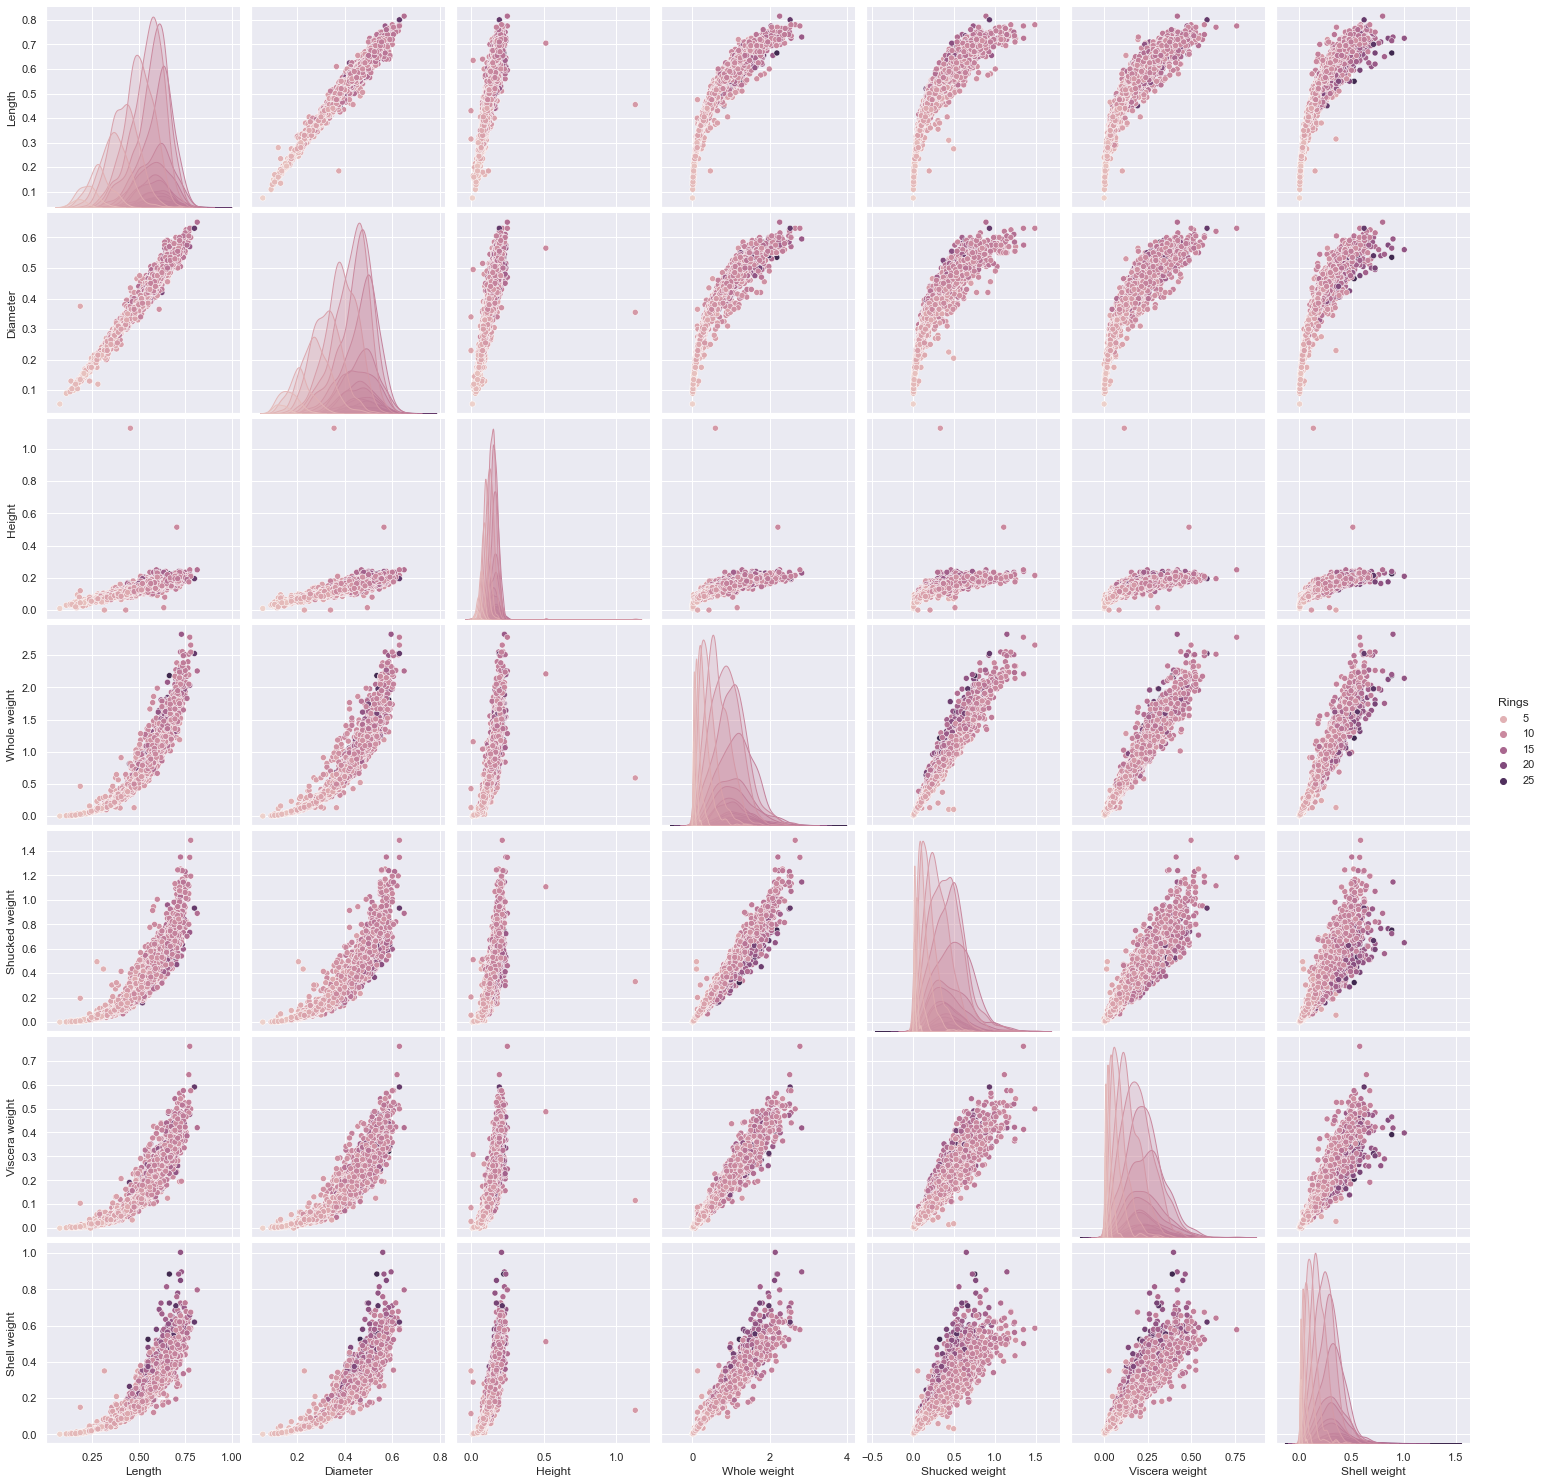

In [158]:
sns.pairplot(df, hue="Rings", size=3)
plt.show()

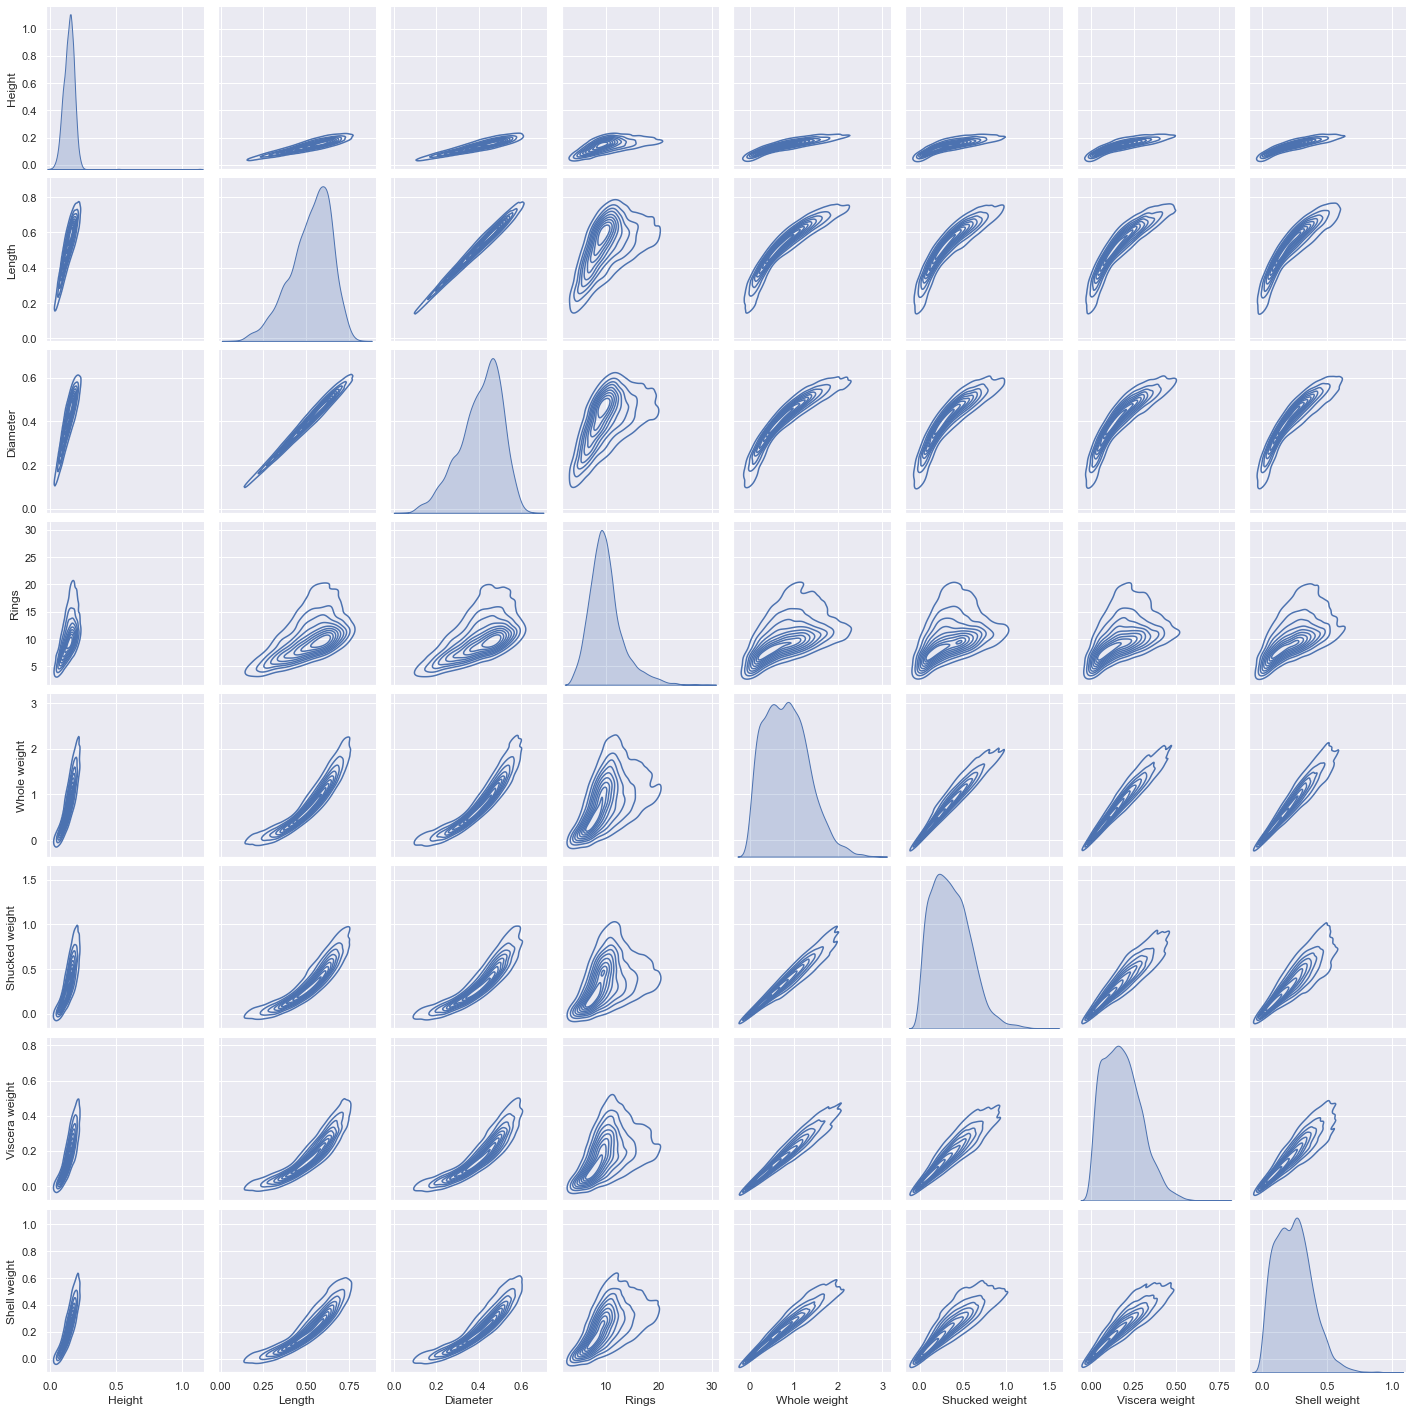

In [189]:
sns.pairplot(data=df[["Height","Length","Diameter","Rings","Whole weight","Shucked weight","Viscera weight","Shell weight"]],kind="kde")

### 4.Descriptive Analysis

In [185]:
df.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.950682
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.197365
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,4.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### 5. Deal with Missing Values

In [162]:
df.fillna(method='bfill')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [163]:
print(df.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


### 6. Finding outliers and replacing it

In [164]:
outliers=df.quantile(q=(0.25,0.75))
outliers

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0


In [165]:
a = df.Rings.quantile(0.25)
b = df.Rings.quantile(0.75)
c = b - a
lower_limit = a - 1.5 * c
df.median(numeric_only=True)

Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

<AxesSubplot:xlabel='Rings'>

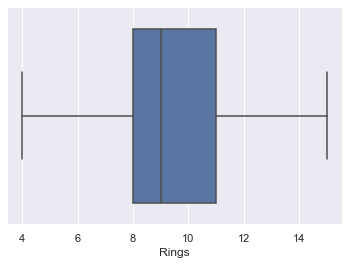

In [166]:
df['Rings'] = np.where(df['Rings'] < lower_limit, 7, df['Rings'])
sns.boxplot(x=df.Rings,showfliers = False)

In [167]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### 7. Categorical columnd and encoding


In [168]:
categorical_columns = ['Sex']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',columns = categorical_columns,drop_first =True,dtype='int8')

In [169]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['Sex' 'Length' 'Diameter' 'Height' 'Whole weight' 'Shucked weight'
 'Viscera weight' 'Shell weight' 'Rings']

Number of rows and columns in the dataset: (4177, 9)

Columns in data frame after encoding dummy variable:
 ['Length' 'Diameter' 'Height' 'Whole weight' 'Shucked weight'
 'Viscera weight' 'Shell weight' 'Rings' 'OHE_I' 'OHE_M']

Number of rows and columns in the dataset: (4177, 10)


Encoding

In [170]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['Rings'],alpha=0.05)

#df['charges'] = y_bc  
# it did not perform better for this model, so log transform is used
ci,lam

((-0.07955249392474624, 0.06789993366236946), -0.005833742804769754)

In [171]:
df_encode['Rings'] = np.log(df_encode['Rings'])

### 8. Splitting into Dependent and Independent variables

In [172]:
from sklearn.model_selection import train_test_split
x = df_encode.drop('Rings',axis=1) # Independet variable
y = df_encode['Rings'] # dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=23)

### 9. Scale the Independent variables

In [173]:
X_train_0 = np.c_[np.ones((x_train.shape[0],1)),x_train]
X_test_0 = np.c_[np.ones((x_test.shape[0],1)),x_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [174]:
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(x.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

### 11. Model

In [175]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

### 12. Train the model

In [176]:
lin_model = lin_reg.fit(x_train,y_train) 

In [177]:

sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,1.459600,1.459600
1,theta_1,Length,0.209046,0.209046
2,theta_2,Diameter,1.249678,1.249678
3,theta_3,Height,1.886319,1.886319
4,theta_4,Whole weight,0.632010,0.632010
5,theta_5,Shucked weight,-1.612520,-1.612520
6,theta_6,Viscera weight,-0.784396,-0.784396
7,theta_7,Shell weight,0.576633,0.576633
8,theta_8,OHE_I,-0.095840,-0.095840
9,theta_9,OHE_M,-0.001070,-0.001070


### 13. Test the model

In [178]:
#Model fitting for Training set
y_train_pred = lin_model.predict(x_train)

#Model Fitting for the testing set
y_test_pred = lin_model.predict(x_test)

In [179]:
#Performance of Testing set

MSE_test = mean_squared_error(y_test_pred, y_test)
RMSE_test = np.sqrt(MSE_test)
MAE_test = mean_absolute_error(y_test_pred, y_test)
R2_test = r2_score(y_test_pred, y_test)
print('RMSE for Testing set = {:.2f}'.format(RMSE_test))
print('MAE for Testing set = {:.2f}'.format(MAE_test))
print('R^2 for Testing set = {:.2f}'.format(R2_test))

RMSE for Testing set = 0.20
MAE for Testing set = 0.15
R^2 for Testing set = 0.27


### 14. Measure performance using Metrics

In [180]:
y_test = y_test.apply(int)

In [181]:
y_test_pred = y_test_pred.astype(int)

In [182]:
metrics.confusion_matrix(y_test_pred,y_test)

array([[152,  32,   0],
       [ 93, 958,  13],
       [  0,   4,   2]], dtype=int64)

In [183]:
metrics.accuracy_score(y_test_pred,y_test)

0.886762360446571

In [184]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.83      0.62      0.71       245
           2       0.90      0.96      0.93       994
           3       0.33      0.13      0.19        15

    accuracy                           0.89      1254
   macro avg       0.69      0.57      0.61      1254
weighted avg       0.88      0.89      0.88      1254

